In [24]:
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [23]:
import numpy as np

In [25]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Basic Blocks of RNNs

In [4]:
tf.reset_default_graph()

In [5]:
n_inputs = 3

In [6]:
n_neurons = 5

In [7]:
X0 = tf.placeholder(tf.float32, [None, n_inputs])

In [8]:
X1 = tf.placeholder(tf.float32, [None, n_inputs])

In [13]:
Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons],dtype=tf.float32))

In [14]:
Wy = tf.Variable(tf.random_normal(shape=[n_neurons,n_neurons],dtype=tf.float32))

In [10]:
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

In [11]:
Y0 = tf.tanh(tf.matmul(X0, Wx) + b)

In [15]:
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

In [16]:
init = tf.global_variables_initializer()

In [17]:
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) # t = 0

In [18]:
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 1

In [19]:
with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

In [20]:
Y0_val

array([[ 0.99943894, -0.6669616 ,  0.9939652 ,  0.47666293, -0.9963945 ],
       [ 1.        , -0.90663785,  0.99999994,  0.9962514 , -1.        ],
       [ 1.        , -0.97628164,  1.        ,  0.9999801 , -1.        ],
       [ 0.98461556,  0.8583661 ,  0.99763393,  0.9999982 , -0.9852484 ]],
      dtype=float32)

In [21]:
Y1_val

array([[-1.        , -1.        , -0.92635477, -0.5469742 ,  1.        ],
       [-0.28071424, -0.39149138, -0.8700373 ,  0.98904276,  0.1483936 ],
       [-1.        , -1.        , -0.8997308 ,  0.50449634,  1.        ],
       [-0.9999945 , -0.9999989 ,  0.98152286,  0.99644923,  0.9999988 ]],
      dtype=float32)

# RNN using static_rnn()

In [23]:
tf.reset_default_graph()

In [24]:
n_inputs = 3
n_neurons = 5

In [25]:
X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

In [26]:
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

In [27]:
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, [X0, X1],
                                                dtype=tf.float32)

In [28]:
Y0, Y1 = output_seqs

In [29]:
init = tf.global_variables_initializer()

In [30]:
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])

In [31]:
with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

In [32]:
Y0_val

array([[ 0.25267425, -0.7323296 , -0.08636428, -0.8761554 , -0.43493342],
       [-0.31075075, -0.7330174 , -0.9372993 , -0.99961144,  0.8935051 ],
       [-0.7167942 , -0.7337037 , -0.99751204, -0.9999988 ,  0.99751174],
       [-0.99874973,  0.9999687 , -0.99899805,  0.080038  ,  0.9999249 ]],
      dtype=float32)

In [33]:
Y1_val

array([[-0.9238208 ,  0.6831391 , -0.99976885, -0.99999946,  0.999991  ],
       [-0.08175332,  0.25234538, -0.6111191 ,  0.7982308 ,  0.45540696],
       [-0.94137853,  0.8222735 , -0.9994654 , -0.996395  ,  0.99991167],
       [-0.8990095 ,  0.8253965 , -0.9960373 , -0.19592685,  0.99740696]],
      dtype=float32)

## Using Single Placeholder of Input sequence instead of X0, X1

In [41]:
tf.reset_default_graph()

In [42]:
n_steps = 2
n_inputs = 3
n_neurons = 5

In [43]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

In [44]:
X_seqs = tf.unstack(tf.transpose(X, perm=[1, 0, 2]))

In [45]:
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, X_seqs,
                                                dtype=tf.float32)

In [46]:
outputs = tf.transpose(tf.stack(output_seqs), perm=[1, 0, 2])

In [47]:
init = tf.global_variables_initializer()

In [50]:
X_batch = np.array([
                 # t = 0      t = 1 
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

In [51]:
with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

In [52]:
outputs_val

array([[[ 0.40820664, -0.44872114, -0.5016123 , -0.9247648 ,
         -0.73096263],
        [ 0.99994516, -1.        , -1.        , -0.9999461 ,
         -1.        ]],

       [[ 0.9683224 , -0.99929035, -0.998417  , -0.9990134 ,
         -0.99989796],
        [ 0.87854064,  0.14826626,  0.3632318 , -0.68301535,
          0.6660017 ]],

       [[ 0.99876803, -0.99999934, -0.9999963 , -0.9999875 ,
         -1.        ],
        [ 0.999558  , -0.99999374, -0.9999259 , -0.99851733,
         -0.9999932 ]],

       [[ 0.965602  , -0.99995416, -0.9999904 ,  0.97732383,
         -0.999914  ],
        [ 0.8914125 , -0.99899644, -0.99372244, -0.9808852 ,
         -0.98605955]]], dtype=float32)

## RNN using dynamic_rnn()

In [53]:
tf.reset_default_graph()

In [54]:
n_steps = 2
n_inputs = 3
n_neurons = 5

In [55]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

In [56]:
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

In [57]:
init = tf.global_variables_initializer()

In [58]:
X_batch = np.array([
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])


In [59]:
with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

In [60]:
outputs_val

array([[[ 0.18239515, -0.80307823,  0.64348894, -0.47830993,
          0.51076573],
        [ 0.99998826, -1.        , -0.9288345 , -0.9786592 ,
          0.98310816]],

       [[ 0.9816739 , -0.99990493,  0.48593417, -0.93173474,
          0.90005124],
        [-0.21439496, -0.7271302 , -0.45415536,  0.84972245,
          0.63622206]],

       [[ 0.9997527 , -0.9999998 ,  0.28887856, -0.9929474 ,
          0.98305506],
        [ 0.99922925, -0.9999996 , -0.93649995, -0.49414232,
          0.97006303]],

       [[ 0.9999777 , -0.99999493, -0.69184357, -0.9975824 ,
          0.7688107 ],
        [ 0.9597724 , -0.9989009 , -0.93303317,  0.33379957,
          0.92250955]]], dtype=float32)

## Set the sequence length of the input

In [62]:
tf.reset_default_graph()

In [63]:
n_steps = 2
n_inputs = 3
n_neurons = 5

In [64]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

In [66]:
seq_length = tf.placeholder(tf.int32, [None])
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32,
                                    sequence_length=seq_length)

In [67]:
init = tf.global_variables_initializer()


In [68]:
X_batch = np.array([
        # step 0     step 1
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2 (padded with zero vectors)
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])
seq_length_batch = np.array([2, 1, 2, 2])

In [69]:
with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run(
        [outputs, states], feed_dict={X: X_batch, seq_length: seq_length_batch})

In [70]:
outputs_val

array([[[-0.6826812 ,  0.21766104, -0.39510185, -0.7681202 ,
         -0.32475707],
        [-0.99999905,  0.70631766, -0.8972653 , -1.        ,
         -0.9342006 ]],

       [[-0.9984358 ,  0.6167569 , -0.80408365, -0.99953526,
         -0.6521631 ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ]],

       [[-0.99999356,  0.8391544 , -0.9470425 , -0.9999993 ,
         -0.83999336],
        [-0.99974215,  0.3705725 , -0.489019  , -0.99995476,
         -0.9543035 ]],

       [[-0.9999108 ,  0.9069009 , -0.71014035, -0.9876588 ,
          0.22388506],
        [-0.9599836 ,  0.05959236, -0.46032807, -0.98209596,
         -0.792309  ]]], dtype=float32)

In [71]:
states_val

array([[-0.99999905,  0.70631766, -0.8972653 , -1.        , -0.9342006 ],
       [-0.9984358 ,  0.6167569 , -0.80408365, -0.99953526, -0.6521631 ],
       [-0.99974215,  0.3705725 , -0.489019  , -0.99995476, -0.9543035 ],
       [-0.9599836 ,  0.05959236, -0.46032807, -0.98209596, -0.792309  ]],
      dtype=float32)

## A Sequence classifier using RNN

In [72]:
tf.reset_default_graph()

In [73]:
n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

In [74]:
learning_rate = 0.001

In [75]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

In [76]:
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

In [77]:
logits = tf.layers.dense(states, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                          logits=logits)

In [78]:
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [79]:
init = tf.global_variables_initializer()

In [80]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [81]:
X_test = mnist.test.images.reshape((-1, n_steps, n_inputs))
y_test = mnist.test.labels

In [83]:
n_epochs = 100
batch_size = 150

In [84]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

0 Train accuracy: 0.88 Test accuracy: 0.9275
1 Train accuracy: 0.9533333 Test accuracy: 0.9533
2 Train accuracy: 0.98 Test accuracy: 0.9601
3 Train accuracy: 0.97333336 Test accuracy: 0.9651
4 Train accuracy: 0.9533333 Test accuracy: 0.9617
5 Train accuracy: 0.96 Test accuracy: 0.9649
6 Train accuracy: 0.99333334 Test accuracy: 0.9696
7 Train accuracy: 0.98 Test accuracy: 0.9732
8 Train accuracy: 0.96666664 Test accuracy: 0.9596
9 Train accuracy: 0.9866667 Test accuracy: 0.9699
10 Train accuracy: 0.99333334 Test accuracy: 0.9721
11 Train accuracy: 0.9866667 Test accuracy: 0.969
12 Train accuracy: 0.9866667 Test accuracy: 0.9756
13 Train accuracy: 0.97333336 Test accuracy: 0.9707
14 Train accuracy: 0.9866667 Test accuracy: 0.9729
15 Train accuracy: 0.9866667 Test accuracy: 0.977
16 Train accuracy: 0.98 Test accuracy: 0.9728
17 Train accuracy: 0.97333336 Test accuracy: 0.9732
18 Train accuracy: 0.99333334 Test accuracy: 0.9739
19 Train accuracy: 0.97333336 Test accuracy: 0.9787
20 Train 

## Deep RNN

In [85]:
tf.reset_default_graph()

In [86]:
n_steps = 28
n_inputs = 28
n_outputs = 10

In [87]:
learning_rate = 0.001


In [88]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

In [89]:
n_neurons = 100
n_layers = 3

In [90]:
layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons,
                                      activation=tf.nn.relu)
          for layer in range(n_layers)]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [91]:
states_concat = tf.concat(axis=1, values=states)
logits = tf.layers.dense(states_concat, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [92]:
init = tf.global_variables_initializer()


In [93]:
n_epochs = 10
batch_size = 150

In [94]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

0 Train accuracy: 0.9533333 Test accuracy: 0.9373
1 Train accuracy: 0.94666666 Test accuracy: 0.9522
2 Train accuracy: 0.97333336 Test accuracy: 0.9639
3 Train accuracy: 0.9866667 Test accuracy: 0.9702
4 Train accuracy: 0.98 Test accuracy: 0.9751
5 Train accuracy: 0.99333334 Test accuracy: 0.9716
6 Train accuracy: 0.9866667 Test accuracy: 0.9758
7 Train accuracy: 0.98 Test accuracy: 0.9773
8 Train accuracy: 0.97333336 Test accuracy: 0.9772
9 Train accuracy: 0.9866667 Test accuracy: 0.9767


## RNN on Time Series Input

In [114]:
tf.reset_default_graph()

In [115]:
n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

In [116]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [117]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)

In [118]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [119]:
learning_rate = 0.001

In [120]:
loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

In [121]:
init = tf.global_variables_initializer()

In [122]:
saver = tf.train.Saver()

In [127]:
n_iterations = 1500
batch_size = 50

In [128]:
t_min, t_max = 0, 30
resolution = 0.1

In [130]:
def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

In [131]:
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    saver.save(sess, "./my_time_series_model")

0 	MSE: 13.502874
100 	MSE: 0.54061747
200 	MSE: 0.22409551
300 	MSE: 0.12260756
400 	MSE: 0.07206648
500 	MSE: 0.058152877
600 	MSE: 0.048744664
700 	MSE: 0.045227066
800 	MSE: 0.047893647
900 	MSE: 0.04826317
1000 	MSE: 0.0531333
1100 	MSE: 0.052393086
1200 	MSE: 0.052677516
1300 	MSE: 0.042138457
1400 	MSE: 0.045257702


In [133]:
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))
n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

In [134]:
with tf.Session() as sess:                          
    saver.restore(sess, "./my_time_series_model")   

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

INFO:tensorflow:Restoring parameters from ./my_time_series_model


In [135]:
y_pred

array([[[-3.4262993 ],
        [-2.5089657 ],
        [-1.1845334 ],
        [ 0.63997704],
        [ 2.1569047 ],
        [ 3.1297774 ],
        [ 3.450217  ],
        [ 3.2909336 ],
        [ 2.7966793 ],
        [ 2.1449332 ],
        [ 1.6176579 ],
        [ 1.5594382 ],
        [ 1.9534916 ],
        [ 2.7367785 ],
        [ 3.8570538 ],
        [ 5.0754204 ],
        [ 6.031     ],
        [ 6.6174316 ],
        [ 6.602131  ],
        [ 6.016521  ]]], dtype=float32)

Text(0.5,0,'Time')

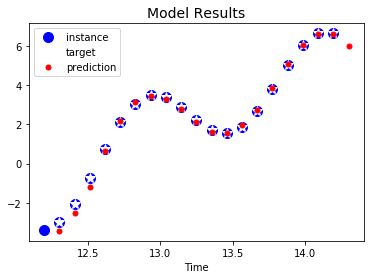

In [137]:
plt.title("Model Results", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")


## Without OutputProjectionWrapper

In [138]:
tf.reset_default_graph()

In [139]:
n_steps = 20
n_inputs = 1
n_neurons = 100

In [140]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [141]:
cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [142]:
n_outputs = 1
learning_rate = 0.001

In [143]:
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

In [145]:
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

In [146]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [148]:
n_iterations = 1500
batch_size = 50

In [149]:
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})
    
    saver.save(sess, "./my_time_series_model")

0 	MSE: 17.4896
100 	MSE: 0.48010302
200 	MSE: 0.1480798
300 	MSE: 0.06630911
400 	MSE: 0.056855347
500 	MSE: 0.053097036
600 	MSE: 0.050587628
700 	MSE: 0.049329393
800 	MSE: 0.053927157
900 	MSE: 0.046535447
1000 	MSE: 0.050720457
1100 	MSE: 0.05985437
1200 	MSE: 0.042936336
1300 	MSE: 0.03820088
1400 	MSE: 0.040308107


In [150]:
y_pred

array([[[-3.403309  ],
        [-2.465045  ],
        [-1.1194261 ],
        [ 0.68163264],
        [ 2.1593146 ],
        [ 3.150626  ],
        [ 3.4807363 ],
        [ 3.3353927 ],
        [ 2.836157  ],
        [ 2.2179325 ],
        [ 1.6634594 ],
        [ 1.525277  ],
        [ 1.9279983 ],
        [ 2.8035438 ],
        [ 3.93337   ],
        [ 5.068434  ],
        [ 6.0915737 ],
        [ 6.6609144 ],
        [ 6.6526904 ],
        [ 6.0232215 ]]], dtype=float32)

Text(0.5,0,'Time')

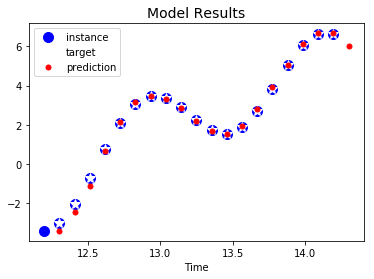

In [151]:
plt.title("Model Results", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

## Generating sequences

In [158]:
with tf.Session() as sess:                        
    saver.restore(sess, "./my_time_series_model")
    
    sequence = [0.] * n_steps
    for iteration in range(300):
        X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./my_time_series_model


Text(0,0.5,'Value')

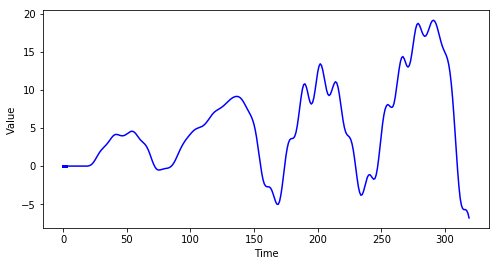

In [159]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(len(sequence)), sequence, "b-")
plt.plot(t[:n_steps], sequence[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")

In [160]:
with tf.Session() as sess:
    saver.restore(sess, "./my_time_series_model")

    sequence1 = [0. for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence1[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence1.append(y_pred[0, -1, 0])

    sequence2 = [time_series(i * resolution + t_min + (t_max-t_min/3)) for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence2[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence2.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./my_time_series_model


Text(0.5,0,'Time')

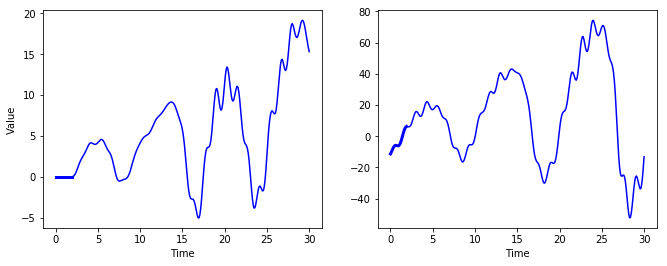

In [161]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(t, sequence1, "b-")
plt.plot(t[:n_steps], sequence1[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.plot(t, sequence2, "b-")
plt.plot(t[:n_steps], sequence2[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")

## MultiRNNCell

In [162]:
tf.reset_default_graph()

In [163]:
n_inputs = 2
n_steps = 5

In [164]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

In [165]:
n_neurons = 100
n_layers = 3

In [166]:
layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
          for layer in range(n_layers)]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [167]:
init = tf.global_variables_initializer()

In [169]:
X_batch = np.random.rand(2, n_steps, n_inputs)

In [170]:
with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X: X_batch})

In [171]:
outputs_val.shape

(2, 5, 100)

## Add Dropout 

In [172]:
tf.reset_default_graph()

In [173]:
n_inputs = 1
n_neurons = 100
n_layers = 3
n_steps = 20
n_outputs = 1

In [174]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [175]:
keep_prob = tf.placeholder_with_default(1.0, shape=())

In [176]:
cells = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
         for layer in range(n_layers)]
cells_drop = [tf.contrib.rnn.DropoutWrapper(cell, input_keep_prob=keep_prob)
              for cell in cells]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells_drop)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [177]:
learning_rate = 0.01

In [178]:
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

In [179]:
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

In [180]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [181]:
n_iterations = 1500
batch_size = 50
train_keep_prob = 0.5

In [182]:
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        _, mse = sess.run([training_op, loss],
                          feed_dict={X: X_batch, y: y_batch,
                                     keep_prob: train_keep_prob})
        if iteration % 100 == 0:                   
            print(iteration, "Training MSE:", mse) 
    
    saver.save(sess, "./my_dropout_time_series_model")

0 Training MSE: 17.065445
100 Training MSE: 4.619217
200 Training MSE: 4.2022305
300 Training MSE: 4.111127
400 Training MSE: 3.590899
500 Training MSE: 3.8816698
600 Training MSE: 3.924747
700 Training MSE: 3.368391
800 Training MSE: 3.4006612
900 Training MSE: 3.396326
1000 Training MSE: 4.562546
1100 Training MSE: 4.8962317
1200 Training MSE: 5.529297
1300 Training MSE: 4.859384
1400 Training MSE: 5.950631


In [183]:
with tf.Session() as sess:
    saver.restore(sess, "./my_dropout_time_series_model")

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

INFO:tensorflow:Restoring parameters from ./my_dropout_time_series_model


Text(0.5,0,'Time')

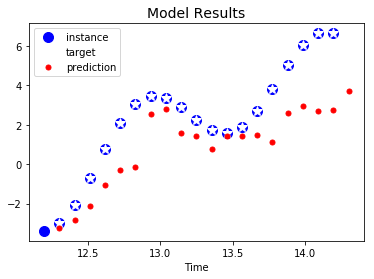

In [184]:
plt.title("Model Results", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

# LSTM

In [185]:
tf.reset_default_graph()

In [186]:
lstm_cell = tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)

In [187]:
n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10
n_layers = 3

In [188]:
learning_rate = 0.001


In [189]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

In [190]:
lstm_cells = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)
              for layer in range(n_layers)]
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)
outputs, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)

In [191]:
top_layer_h_state = states[-1][1]
logits = tf.layers.dense(top_layer_h_state, n_outputs, name="softmax")

In [192]:
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [193]:
init = tf.global_variables_initializer()

In [194]:
states

(LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_5:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_6:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_7:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 150) dtype=float32>))

In [195]:
top_layer_h_state

<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 150) dtype=float32>

In [196]:
n_epochs = 10
batch_size = 150

In [198]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((batch_size, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print("Epoch", epoch, "Train accuracy =", acc_train, "Test accuracy =", acc_test)

Epoch 0 Train accuracy = 0.97333336 Test accuracy = 0.9563
Epoch 1 Train accuracy = 0.96 Test accuracy = 0.9617
Epoch 2 Train accuracy = 0.98 Test accuracy = 0.9798
Epoch 3 Train accuracy = 1.0 Test accuracy = 0.9833
Epoch 4 Train accuracy = 1.0 Test accuracy = 0.9864
Epoch 5 Train accuracy = 1.0 Test accuracy = 0.9841
Epoch 6 Train accuracy = 1.0 Test accuracy = 0.9839
Epoch 7 Train accuracy = 0.99333334 Test accuracy = 0.9863
Epoch 8 Train accuracy = 1.0 Test accuracy = 0.9882
Epoch 9 Train accuracy = 0.99333334 Test accuracy = 0.9853


## Embeddings/Word2vec

In [13]:
from six.moves import urllib

import errno
import os
import zipfile

WORDS_PATH = "datasets/words"
WORDS_URL = 'http://mattmahoney.net/dc/text8.zip'

def fetch_words_data(words_url=WORDS_URL, words_path=WORDS_PATH):
    os.makedirs(words_path, exist_ok=True)
    zip_path = os.path.join(words_path, "words.zip")
    if not os.path.exists(zip_path):
        urllib.request.urlretrieve(words_url, zip_path)
    with zipfile.ZipFile(zip_path) as f:
        data = f.read(f.namelist()[0])
    return data.decode("ascii").split()

In [14]:
words = fetch_words_data()

In [16]:
words[:5]

['anarchism', 'originated', 'as', 'a', 'term']

In [22]:
from collections import Counter

In [18]:
vocabulary_size = 50000

In [19]:
vocabulary = [("UNK", None)] + Counter(words).most_common(vocabulary_size - 1)

In [26]:
vocabulary = np.array([word for word, _ in vocabulary])

In [27]:
dictionary = {word: code for code, word in enumerate(vocabulary)}

In [28]:
data = np.array([dictionary.get(word, 0) for word in words])

In [32]:
" ".join(words[:10]), data[:10]

('anarchism originated as a term of abuse first used against',
 array([5234, 3081,   12,    6,  195,    2, 3134,   46,   59,  156]))

In [33]:
" ".join([vocabulary[index] for index in [5241, 3081, 12, 6, 195, 2, 3134, 46, 59, 156]])

'cycles originated as a term of abuse first used against'

In [36]:
# Utility function to create batch
import random
from collections import deque

def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    span = 2 * skip_window + 1 # 
    buffer = deque(maxlen=span)
    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    for i in range(batch_size // num_skips):
        target = skip_window  
        targets_to_avoid = [ skip_window ]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = random.randint(0, span - 1)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    return batch, labels

In [37]:
data_index=0
batch, labels = generate_batch(8, 2, 1)

In [41]:
labels, [vocabulary[word] for word in labels[:, 0]]

(array([[5234],
        [  12],
        [   6],
        [3081],
        [ 195],
        [  12],
        [   6],
        [   2]], dtype=int32),
 ['anarchism', 'as', 'a', 'originated', 'term', 'as', 'a', 'of'])

In [42]:
batch_size = 128

In [43]:
embedding_size = 128

In [44]:
skip_window = 1

In [45]:
num_skips = 2

In [46]:
valid_size = 16

In [47]:
valid_window = 100

In [54]:
valid_examples = np.random.choice(valid_window, valid_size, replace=False)

In [55]:
valid_examples

array([15, 93, 63, 46, 96, 67, 11, 77, 24, 84, 45, 90, 64,  4, 59, 92])

In [49]:
num_sampled = 64

In [50]:
learning_rate = 0.01

In [51]:
tf.reset_default_graph()

In [52]:
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])

In [53]:
valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

In [56]:
vocabulary_size = 50000

In [57]:
embedding_size = 150

In [58]:
init_embeds = tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0)

In [59]:
embeddings = tf.Variable(init_embeds)

In [60]:
train_inputs = tf.placeholder(tf.int32, shape=[None])

In [61]:
embed = tf.nn.embedding_lookup(embeddings, train_inputs)

In [63]:
nce_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_size],
                        stddev=1.0 / np.sqrt(embedding_size)))

In [64]:
nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

In [66]:
loss = tf.reduce_mean(
    tf.nn.nce_loss(nce_weights, nce_biases, train_labels, embed,
                   num_sampled, vocabulary_size))

In [67]:
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

In [70]:
norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), axis=1, keepdims=True))

In [71]:
normalized_embeddings = embeddings / norm

In [72]:
normalized_embeddings = embeddings / norm

In [74]:
valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)

In [76]:
similarity = tf.matmul(valid_embeddings, normalized_embeddings, transpose_b=True)

In [77]:
init = tf.global_variables_initializer()

In [78]:
num_steps = 10001

In [79]:
with tf.Session() as session:
    init.run()

    average_loss = 0
    for step in range(num_steps):
        print("\rIteration: {}".format(step), end="\t")
        batch_inputs, batch_labels = generate_batch(batch_size, num_skips, skip_window)
        feed_dict = {train_inputs : batch_inputs, train_labels : batch_labels}
        _, loss_val = session.run([training_op, loss], feed_dict=feed_dict)
        average_loss += loss_val

        if step % 2000 == 0:
            if step > 0:
                average_loss /= 2000
            print("Average loss at step ", step, ": ", average_loss)
            average_loss = 0

        if step % 10000 == 0:
            sim = similarity.eval()
            for i in range(valid_size):
                valid_word = vocabulary[valid_examples[i]]
                top_k = 8 
                nearest = (-sim[i, :]).argsort()[1:top_k+1]
                log_str = "Nearest to %s:" % valid_word
                for k in range(top_k):
                    close_word = vocabulary[nearest[k]]
                    log_str = "%s %s," % (log_str, close_word)
                print(log_str)

    final_embeddings = normalized_embeddings.eval()

Iteration: 0	Average loss at step  0 :  271.534912109375
Nearest to s: unwittingly, burkina, cear, blasphemy, vlaamse, bakersfield, exocet, milliardo,
Nearest to often: ystem, auctions, whale, archive, peachtree, unemployed, coalesced, libel,
Nearest to into: modernist, significantly, manic, mf, k, historiography, upgrades, namely,
Nearest to first: artistry, silos, armenians, susannah, inflammation, discrepancies, premium, residue,
Nearest to history: tw, ugarit, memex, kazakstan, beets, irate, julien, pianists,
Nearest to only: paragon, flattered, premise, avengers, baptize, daoud, giants, reconstructing,
Nearest to is: significance, commercialization, assurances, crevasses, floss, churchmen, charenton, dominos,
Nearest to however: weil, shoguns, bolsheviks, leafy, polyurethane, illusory, grosse, sympathetic,
Nearest to with: forbid, machete, stunned, rails, trustees, nuns, clearance, crypto,
Nearest to war: fiber, recife, aloes, outback, loewe, bagdad, nicola, hangovers,
Nearest to 

In [80]:
from sklearn.manifold import TSNE

In [81]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)

In [ ]:
plot_only = 500

In [83]:
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only,:])

In [84]:
labels = [vocabulary[i] for i in range(plot_only)]

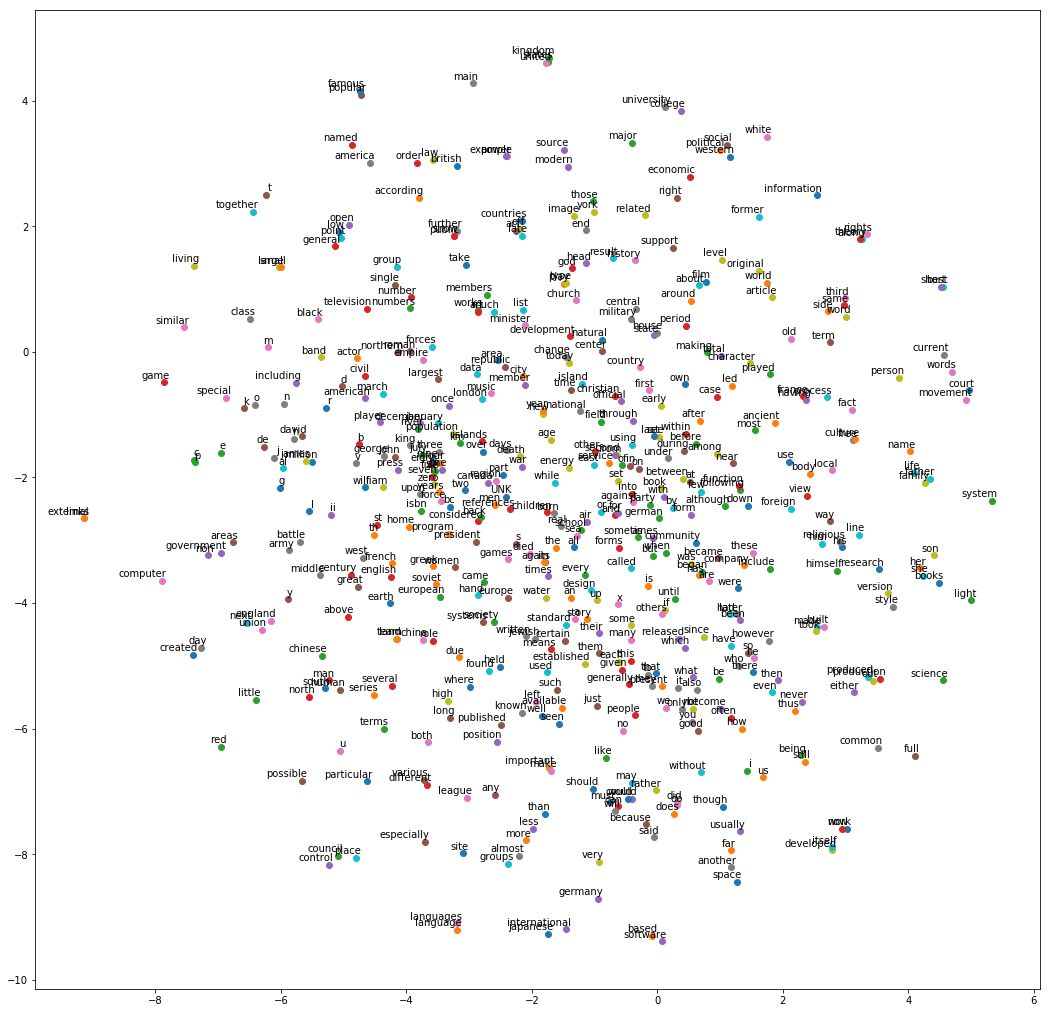

In [87]:
plt.figure(figsize=(18, 18))  
for i, label in enumerate(labels):
    x, y = low_dim_embs[i,:]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right',va='bottom')